¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Paso 4 Análisis exploratorio de los datos

In [11]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_districts = pd.read_csv('/datasets/project_sql_result_04.csv')

# Mostrar las primeras filas de cada dataset para explorar los datos
print(df_companies.head())
print(df_districts.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien! importaste las librerías y leíste los datos.

Recuerda que parte de las buenas prácticas es usar una celda independiente para importar las librerías y otra para leer los datos.
</div>

In [12]:
# Comprobar los tipos de datos y si hay valores nulos
print(df_companies.info())
print(df_districts.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [13]:
# Corregir tipos de datos si es necesario
df_companies['trips_amount'] = pd.to_numeric(df_companies['trips_amount'], errors='coerce')
df_districts['average_trips'] = pd.to_numeric(df_districts['average_trips'], errors='coerce')

# Verificar los cambios
print(df_companies.dtypes)
print(df_districts.dtypes)


company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object


In [14]:
# Ordenar por el promedio de viajes y obtener los 10 principales barrios
top_10_districts = df_districts.sort_values(by='average_trips', ascending=False).head(10)

# Mostrar los 10 barrios principales
print(top_10_districts)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


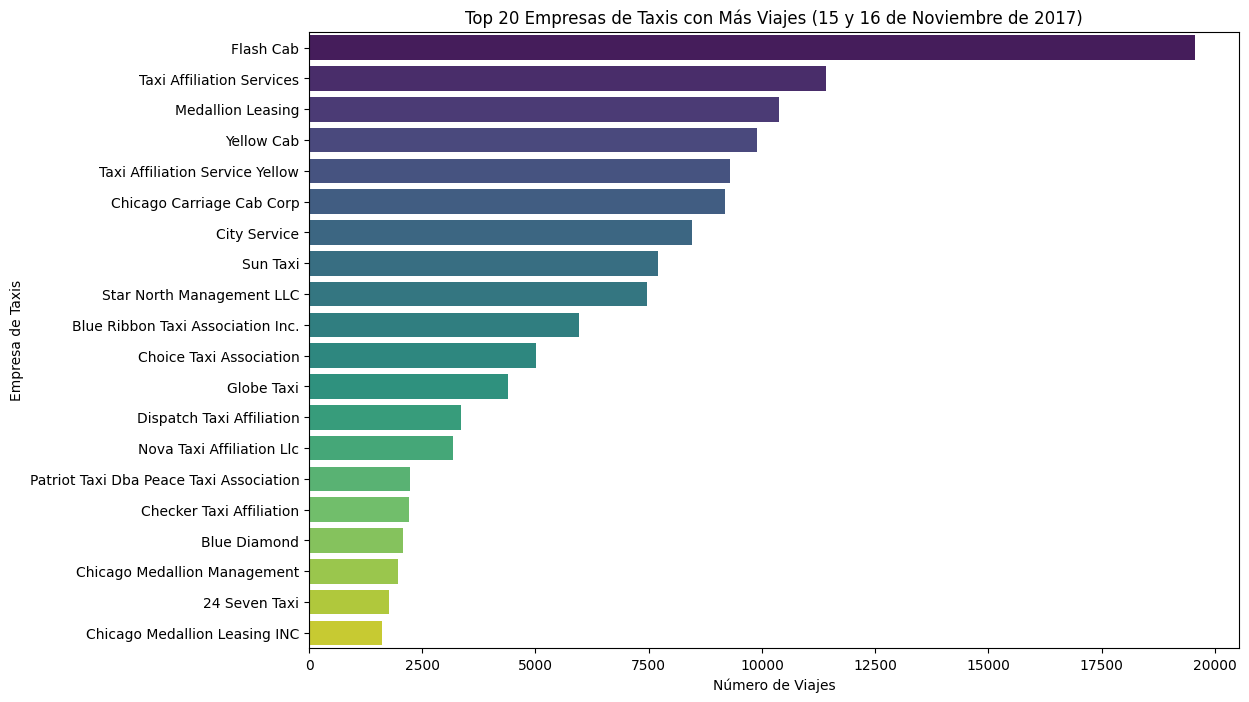

In [15]:
# Ordenar las empresas por el número de viajes en orden descendente y seleccionar las 20 principales
top_20_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(20)

# Configuración del gráfico de barras para las 20 principales empresas
plt.figure(figsize=(12, 8))
sns.barplot(x='trips_amount', y='company_name', data=top_20_companies, palette='viridis')

# Títulos y etiquetas
plt.title('Top 20 Empresas de Taxis con Más Viajes (15 y 16 de Noviembre de 2017)')
plt.xlabel('Número de Viajes')
plt.ylabel('Empresa de Taxis')

# Mostrar gráfico
plt.show()


Primero que nada, redujimos el número de empresas que debian ser mostradas en la grafica, para tener una muestra mucho mas
representativa. Para esas fechas podemos evidenciar que la empresa Flash Club estuvo haciendo algo muy bien porque fue la 
empresa que hizo más viajes, pero lo más curioso es que practicamente dobla en cantidad de viajes a la segunda empresa que fue
Taxi Affiliation Service.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, se obtuvieron correctamente el top de empresas de taxis.
</div>

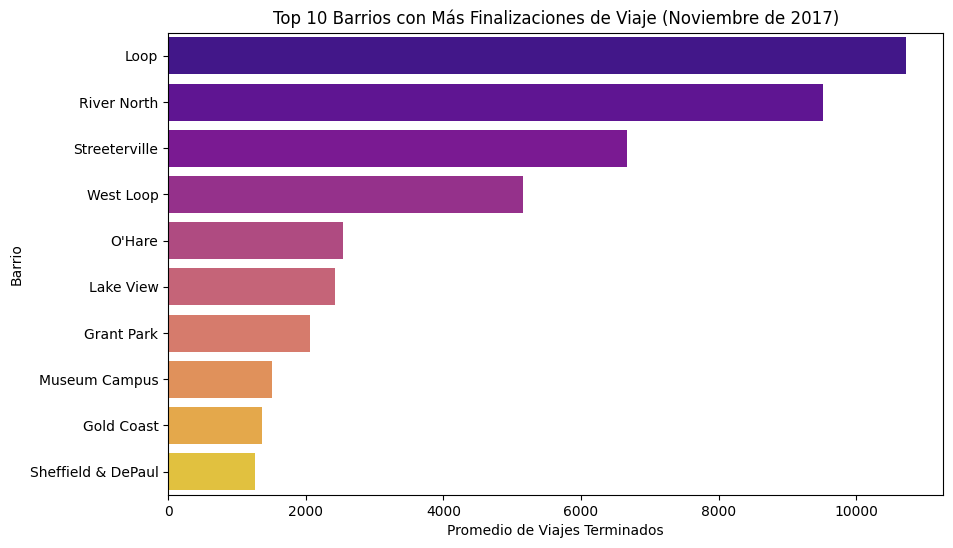

In [16]:
# Configuración del gráfico de barras para los 10 barrios principales
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_districts, palette='plasma')

# Títulos y etiquetas
plt.title('Top 10 Barrios con Más Finalizaciones de Viaje (Noviembre de 2017)')
plt.xlabel('Promedio de Viajes Terminados')
plt.ylabel('Barrio')

# Mostrar gráfico
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, los datos de los vecindarios son correctos.
</div>

Este gráfico nos muestra cuáles fueron los 10 barrios con el mayor número de finalizaciones de viajes en noviembre de 2017.
Los barrios con mayor densidad de población o destinos turísticos (como el Loop o O'Hare) tengan más finalizaciones de viajes.

In [17]:


# Cargar el dataset
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

# Verificar las primeras filas del dataset
df_trips.head()


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


# Paso 5. Prueba de hipótesis

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [18]:
import numpy as np
from scipy import stats

# Convertir 'start_ts' a datetime para poder extraer el día de la semana
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])

# Extraer el día de la semana: 6 representa el sábado
df_trips['day_of_week'] = df_trips['start_ts'].dt.dayofweek

# Filtrar los datos para obtener solo los sábados (day_of_week == 6)
saturdays_trips = df_trips[df_trips['day_of_week'] == 6]

# Dividir los viajes en lluviosos (Bad) y no lluviosos
rainy_saturdays = saturdays_trips[saturdays_trips['weather_conditions'] == 'Bad']
non_rainy_saturdays = saturdays_trips[saturdays_trips['weather_conditions'] != 'Bad']

# Duración de los viajes en cada grupo
rainy_durations = rainy_saturdays['duration_seconds']
non_rainy_durations = non_rainy_saturdays['duration_seconds']


In [19]:
# Eliminar filas con valores nulos en las columnas relevantes
df_trips_clean = df_trips.dropna(subset=['duration_seconds', 'weather_conditions'])

# Comprobar cuántos registros hay en cada grupo
print(df_trips_clean.groupby('weather_conditions').size())


weather_conditions
Bad     180
Good    888
dtype: int64


In [20]:

# Realizar la prueba t entre los grupos de sábado lluvioso y no lluvioso
from scipy.stats import ttest_ind

# Filtrar los datos para los grupos 'Bad' y 'Good'
saturdays_bad = df_trips_clean[(df_trips_clean['weather_conditions'] == 'Bad') & (df_trips_clean['start_ts'].dt.weekday == 5)]
saturdays_good = df_trips_clean[(df_trips_clean['weather_conditions'] == 'Good') & (df_trips_clean['start_ts'].dt.weekday == 5)]

# Realizar la prueba t
t_stat, p_value = ttest_ind(saturdays_bad['duration_seconds'], saturdays_good['duration_seconds'], equal_var=False)

# Mostrar los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 7.186034288068629
P-value: 6.738994326108734e-12


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, la prueba de hipótesis es correcta. Se interpretó adecuadamente el p valor.
</div>

T-statistic: El valor de la t-estadística (7.19) indica cuán grande es la diferencia entre las medias de las dos muestras (en este caso, los viajes los sábados lluviosos vs. los sábados no lluviosos) en comparación con la variabilidad dentro de las muestras. Un valor de t alto sugiere que hay una diferencia significativa entre los dos grupos.

P-value: El valor p (6.74 × 10⁻¹²) es extremadamente pequeño. Un valor p bajo sugiere que la evidencia en contra de la hipótesis nula es muy fuerte. Es decir, es muy poco probable que la diferencia observada entre los grupos sea el resultado del azar.

Conclusión:
Dado que el p-value es mucho menor que el nivel de significancia común de 0.05, rechazamos la hipótesis nula. Esto significa que hay suficiente evidencia para concluir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones muy completas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, 

tu proyecto está bien realizado,

me gustó en especial las gráficas ya que ayudan a comparar las empresas y los vecindarios.

Saludos, Marcos.
</div>